Lambda School Data Science

*Unit 2, Sprint 1, Module 3*

---

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge

# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model. 

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [ ]:
def wrangle(filepath):
    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD',
            'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',  
            'YEAR BUILT', 'SALE PRICE', 'SALE DATE']

      # The column 'SALE DATE' becomes the DatetimeIndex.
    df = pd.read_csv(filepath, usecols=cols,
                     parse_dates=['SALE DATE'],
                     index_col='SALE DATE')
    
      # The dtype for the 'BOROUGH' column is object, not int.
    df['BOROUGH'] = df['BOROUGH'].astype(object)

      # The dtype for the 'SALE PRICE' column is int, not object.
    df['SALE PRICE'] = df['SALE PRICE'].str.replace('\D+', '').astype(int)

      # The dataset includes only one-family dwellings (BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS').
    df = df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']

      # The dataset includes only properties whose sale price is between \$100,000 and \$2,000,000.
    df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 2000000)]

    return df.drop(columns='BUILDING CLASS CATEGORY')

filepath = DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv'

**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [ ]:
df = wrangle(filepath)

**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [ ]:
# Perform your exploratory data analysis here and
# modify the wrangle function above

df


,BOROUGH,NEIGHBORHOOD,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
SALE DATE,,,,,
2019-01-01,3,OCEAN PARKWAY-NORTH,1325.0,1930.0,550000
2019-01-01,4,QUEENS VILLAGE,2001.0,1940.0,200000
2019-01-02,2,PELHAM PARKWAY SOUTH,2043.0,1925.0,810000
2019-01-02,3,FLATBUSH-CENTRAL,2680.0,1899.0,125000
2019-01-02,3,FLATBUSH-EAST,1872.0,1940.0,620000
...,...,...,...,...,...
2019-04-30,4,ROSEDALE,1478.0,1925.0,635000
2019-04-30,4,SOUTH OZONE PARK,1280.0,1930.0,514000
2019-04-30,4,SOUTH OZONE PARK,1333.0,1945.0,635000


In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3151 entries, 2019-01-01 to 2019-04-30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BOROUGH            3151 non-null   object 
 1   NEIGHBORHOOD       3151 non-null   object 
 2   GROSS SQUARE FEET  3151 non-null   float64
 3   YEAR BUILT         3151 non-null   float64
 4   SALE PRICE         3151 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 147.7+ KB


Index(['BOROUGH', 'NEIGHBORHOOD', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE'],
      dtype='object')

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [ ]:
X = df.drop(columns='SALE PRICE')
y = df['SALE PRICE']

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019. 
- Your test set should include data from April 2019.

In [ ]:
mask = (X.index >= "2019-01-01") & (X.index < "2019-04-01")

X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [ ]:
y_pred = [y_train.mean()] * len(y_train)

baseline_mae = mean_absolute_error(y_train, y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 214721.52773001452


# IV. Build Model 

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [ ]:
ohe = OneHotEncoder(use_cat_names=True).fit(X_train)

XT_train = ohe.transform(X_train)
XT_test = ohe.transform(X_test)

**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [ ]:
model_lr = LinearRegression()

model_lr.fit(XT_train,y_train);

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [ ]:
model_r = Ridge(alpha=3)

model_r.fit(XT_train, y_train);

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [ ]:
training_mae_lr = mean_absolute_error(y_train, model_lr.predict(XT_train))
test_mae_lr = mean_absolute_error(y_test, model_lr.predict(XT_test))

print('Linear Training MAE:', training_mae_lr)
print('Linear Test MAE:', test_mae_lr)

Linear Training MAE: 127203.37255684084
Linear Test MAE: 5690532939131.901


**Task 10:** Check the training and test metrics for `model_r`.

In [ ]:
training_mae_r = mean_absolute_error(y_train, model_r.predict(XT_train))
test_mae_r = mean_absolute_error(y_test, model_r.predict(XT_test))

print('Ridge Training MAE:', training_mae_r)
print('Ridge Test MAE:', test_mae_r)


Ridge Training MAE: 128075.06671788277
Ridge Test MAE: 138246.36520775553


**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [ ]:
# Caculate R^2 score

print('Training R-SQUARE (Ridge Model):', r2_score(y_train, model_r.predict(XT_train)))
print('Test R-SQUARE (Ridge Model):', r2_score(y_test, model_r.predict(XT_test)))

Training R-SQUARE (Ridge Model): 0.6040328203099401
Test R-SQUARE (Ridge Model): 0.4907368334009319


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

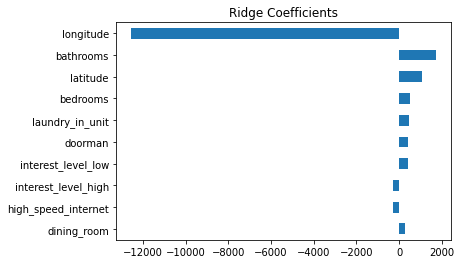

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

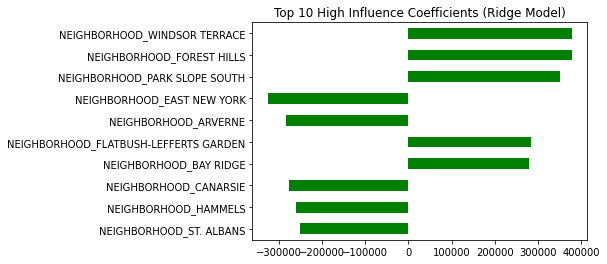

In [ ]:
# List of coefficients
coefficients = model_r.coef_

# List of features
features = ohe.get_feature_names()

# Creating Panda Series with features and their coefficients
feature_relevance = pd.Series(coefficients, index=features)

# Ordering Serie by absolute values
feature_relevance = feature_relevance.sort_values(key=abs)

# Ploting the 10 most important coefficients for model_r (Ridge)
feature_relevance.tail(10).plot(kind='barh', color='green')
plt.title('Top 10 High Influence Coefficients (Ridge Model)');
